# Populasjonsvekst

## Dette må du kunne

I dette eksempelet bruker vi arrays, løkker og plot funksjonalitet.  

## Modell

La $y_{k-1}$ være antallet individer i en populasjon ved tiden $t = t_{k-1}$. Populasjonen kan bestå av mennesker, dyr, celler eller hvilke som helst objekter hvor antall fødsler og dødsfall er proporsjonale med antallet individer. I løpet av tiden mellom $t_{k-1}$ og $t_k$ blir det født $fy_{k-1}$ individer, mens $dy_{k-1}$ individer dør, her er $b$ og $d$ gitte konstanter. Netto vekst av populasjonen er derfor $(b-d)y_{k-1}$. Vekstraten kan uttrykkes som $r = b - d$ og vi kan regne ut antallet individer ved tid $t_k$ 

$$y_k = y_{k-1} + ry_{k-1}$$ 

For å løse denne likningen må vi vite størrelsen på populasjonen $y_0$ ved starttidspunktet. Parameterene $b$ og $d$ er avhengig av hvor lang tid det er mellom $t_k$ og $t_{k-1}$. Feks vil verdiene av $b$ og $d$ være mindre hvis $n$ måles i dager enn hvis $n$ er år.

## Eksempel

La oss gjøre dette litt mer konkret med et eksempel. $y$ representerer nå antall harer som bor på en øy i en innsjø. Fødselsraten er $7\%$ per måned, dødsraten er $2\%$ og vi starter med en bestand på 100 harer. Hvor mange harer bor det på øya etter 2 år? 

Nå må vi sette dette inn i formelen vår. Vi har altså $b = \frac{7\%}{100\%}$ og $d = \frac{2\%}{100\%}$ som gir vekstraten $r = b - d = 0.05$. Videre vet vi at vi starter med $y_0 = 100$ og vi kan regne ut 

$$y_1 = y_0 + r\cdot y_0 =  100 + 0.02\cdot 100 = 105$$
$$y_2 = y_1 + r\cdot y_1 = 105 + 0.02\cdot 102 = 110.25$$
$$\qquad\vdots\qquad\vdots\qquad$$

Slik kan vi fortsette å regne ut utviklingen av harebestanden.
Her er tidssteget mellom $y_0$ og $y_1$ en måned så vi må regne ut 24 tidssteg for å finne ut hvor mange harer som bor på øya etter to år. I stedet for å gjøre dette for hånd kan vi skrive et lite program som gjør dette for oss!  



In [4]:
import numpy as np
n = 12*2    #antall tidsintervaller
y0 = 100     #antall harer når vi starter
r = 0.05     #vekstrate (dvs 2% per mnd)
index_set = range(n+1)
y = np.zeros(len(index_set))
y[0] = y0
for k in index_set[:-1]: 
    y[k+1] = y[k] + r*y[k]

Vi kan nå skrive ut resultatet: 

In [5]:
print y

[ 100.          105.          110.25        115.7625      121.550625
  127.62815625  134.00956406  140.71004227  147.74554438  155.1328216
  162.88946268  171.03393581  179.5856326   188.56491423  197.99315994
  207.89281794  218.28745884  229.20183178  240.66192337  252.69501954
  265.32977051  278.59625904  292.52607199  307.15237559  322.50999437]


Eller vi kan lage et plot:

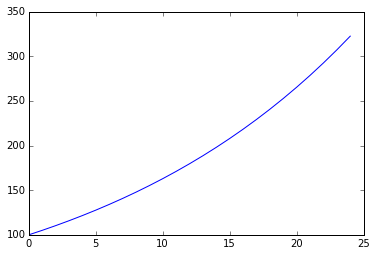

In [6]:
%matplotlib inline
import matplotlib.pyplot as pl
pl.plot(index_set, y)

## Oppgaver

### Oppg 1


a) Hva skjer med harebestanden etter 5, 10 og 20 år? 

b) La oss si at det dukker opp en ørn i område og dødsraten øker til $20\%$ per mnd. Hva skjer med harebestanden etter 2 år? 

c) Diskuter med sidemannen. Hva syns dere om denne modellen? Når kan den være nyttig? Når er den urealistisk?


### Oppg 2

a) Lag et program som simulerer vekst av bakterier. Vi starter med en bakterie. Antall bakterier dobles hver time. Hvor mange bakterier har vi etter ett døgn? 

b) Bakteriene fra a) dyrkes i en bakteriekultur. Etter 15 timer begynner det å bli lite plass og mat igjen og det dør like mange bakterier som det skapes ved celledeling. Etter 18 timer begynner antall celler å synke og $r = -0.3$. Tilpass programmet du laget i a) og finn ut hvor lang tid det tar før antall bakterier er mindre enn 1000.

Hint! Bruk if/else statement.

Du kan lese mer her: http://www.textbookofbacteriology.net/growth_3.html

## Alternativt

Alternativt hvis vi ønsker å se på problemet som en ODE, men det ønsker vi vel egentlig ikke?

In [7]:
def compute_y(y0, r, T, n):
    """Solve y'(t) = r*y with y(0) = y0 for t in [0,T] with n steps."""
    t = np.linspace(0, T, n+1)
    t[0] = 0
    y = np.zeros(n+1)
    y[0] = y0
    dt = T/float(n)
    for k in range(0, n):
        y[k+1] = (r + dt)*y[k]
        t[k+1] = t[k] + dt
    return y, t

Run the function compute_y

In [8]:
T = 40
y, t = compute_y(y0, r, T, n)

Plotting the solution instead of just printing the results

In [10]:
%matplotlib inline
import matplotlib.pyplot as pl
pl.plot(t, y)
print y

NameError: name 'y' is not defined

In [1]:
import numpy as np
n = 6000    #antall tidsintervaller
y0 = 50     #antall byttedyr når vi starter
x0 = 200    #antall rovdyr når vi starter
index_set = range(n+1)

x = np.zeros(len(index_set))
y = np.zeros(len(index_set))

dt = 0.005

a = 1.2
b = 0.005

c = 0.5
d = 0.002


y[0] = y0
x[0] = x0
for k in index_set[:-1]: 
    #print y[k]
    y[k+1] = y[k] - c*dt*y[k] + d*dt*y[k]*x[k]
    x[k+1] = x[k] + a*dt*x[k] - b*dt*x[k]*y[k]

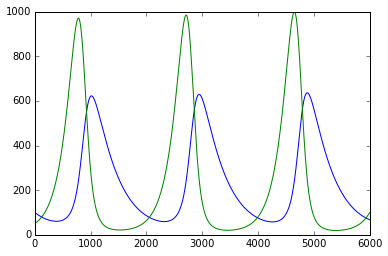

In [2]:
%matplotlib inline
import matplotlib.pyplot as pl
pl.plot(index_set, y)
pl.plot(index_set, x)
pl.show()

In [12]:
import numpy as np
n = 300    #antall tidsintervaller
T = 30.0    #tidslengde

dt = T/n
print dt

S0 = 20000 # antall friske når vi starter
I0 = 100   # antall smittet når vi starter
R0 = 0     # antall fjernet når vi starter

index_set = range(n+1)
t = np.linspace(0,T,n+1)

S = np.zeros(len(t))
I = np.zeros(len(t))
R = np.zeros(len(t))

a = 0.1
b = 0.00005

S[0] = S0
I[0] = I0
R[0] = R0
for k in index_set[:-1]: 
    #print y[k]
    S[k+1] = S[k] - dt*b*S[k]*I[k]
    I[k+1] = I[k] + dt*b*S[k]*I[k] - dt*a*I[k]
    R[k+1] = R[k] + dt*a*I[k]

0.1


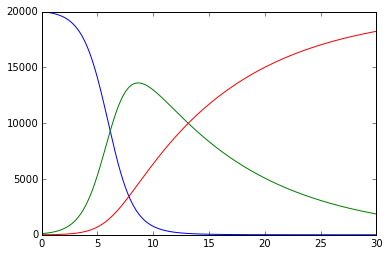

In [13]:
import matplotlib.pyplot as pl
pl.plot(t, S)
pl.plot(t, I)
pl.plot(t, R)
pl.show()

In [7]:
import numpy as np
T = 30.0    #tidslengde

n = int(T*1000)    #antall tidsintervaller

dt = T/n

print dt

S0 = 100    # antall friske når vi starter
I0 = 0      # antall smittet når vi starter
Z0 = 100    # antall zombier når vi start
R0 = 0      # antall fjernet når vi starter

index_set = range(n+1)
t = np.linspace(0,T,n+1)

S = np.zeros(len(t))
I = np.zeros(len(t))
Z = np.zeros(len(t))
R = np.zeros(len(t))

nye_mennesker = 0.5

a = 0.0012*5
b = 0
c = 1
d = 0.014
e = 0.00016

S[0] = S0
I[0] = I0
Z[0] = Z0
R[0] = R0
for k in index_set[:-1]: 
    #print y[k]
    S[k+1] = S[k] + dt*nye_mennesker - dt*a*S[k]*Z[k] - dt*b*S[k]
    I[k+1] = I[k] + dt*a*S[k]*Z[k] - dt*c*I[k] - dt*d*I[k]
    Z[k+1] = Z[k] - dt*c*I[k] - dt*e*S[k]*Z[k]
    R[k+1] = R[k] + dt*d*I[k] + dt*b*S[k] + dt*e*S[k]*Z[k]

0.001


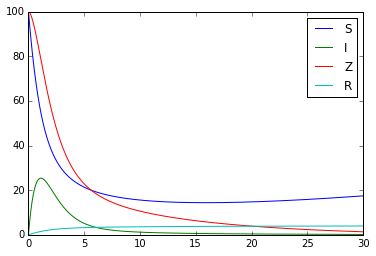

In [11]:
pl.plot(t, S)
pl.plot(t, I)
pl.plot(t, Z)
pl.plot(t, R)
pl.legend(["S","I","Z","R"])
pl.show()